# Goals
+ summaries
+ lumen notices
    + lumen notices per day
+ twitter users
    + twitter users by CS_oldest_archived (should be all completed --3)
    + twitter users by date added
+ twitter statuses
    + count by record_created_at
    + by user
        + indicator before lumen notice served
    + user | notice time | tweets per day before (1day) | tweets per day after (1day)
+ twitter rate_state by checkin due
    
    
+ pivoted tables
    + date by
        + lumen notices
        + twitter user added
        + twitter statuses collected

In [1]:
import os, inspect, json
import pandas as pd
import datetime
%pylab inline
BASE_DIR = os.path.join(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))), "..")

ENV = 'production'

if ENV == 'production':
    pass
#     os.system('ssh -L 3306:127.0.0.1:3306 dmca-cox &')

Populating the interactive namespace from numpy and matplotlib


In [4]:
with open(os.path.join(BASE_DIR, "config") + "/{env}.json".format(env=ENV), "r") as config:
    DBCONFIG = json.loads(config.read())

### LOAD SQLALCHEMY
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
db_engine = create_engine("mysql://{user}:{password}@{host}/{database}".format(
    host=DBCONFIG['host'],
    user=DBCONFIG['user'],
    password=DBCONFIG['password'],
    database=DBCONFIG['database']))

print(DBCONFIG)


{'database': 'civilservant_production', 'user': 'civilservant', 'host': '127.0.0.1', 'password': '', 'client_id': '', 'client_secret': '', 'redirect_uri': ''}


In [5]:
pd.read_sql('select count(*) from twitter_users;', db_engine)

,count(*)
0,58578


In [15]:
# notice_twit_user_table_dropsql = '''drop table if exists notice_twit_user'''
# notice_twit_user_table_sql = '''create TEMPORARY table notice_twit_user as
# (
# select n.date_received as notice_date, ltt.twitter_user_id as user_id from lumen_notices as n
# join lumen_notice_to_twitter_user as ltt
# on n.id = ltt.notice_id
# );'''
# with db_engine.connect() as con:
#     con.execute(notice_twit_user_table_dropsql)
#     con.execute(notice_twit_user_table_sql)
# 
# notice_twit_user = pd.read_sql('select * from notice_twit_user', db_engine, parse_dates=['notice_date'])

/usr/local/lib/python3.6/dist-packages/sqlalchemy/engine/default.py:509: Warning: (1051, "Unknown table 'civilservant_production.notice_twit_user'")
  cursor.execute(statement, parameters)


In [16]:
user_limit = 100
randusers_sql = '''select id, screen_name, record_created_at, last_attempted_process from twitter_users where CS_oldest_tweets_archived = 3 and lang = 'en' order by rand(42) limit {};'''.format(user_limit)
randusers = pd.read_sql(randusers_sql, db_engine)
# randusers

In [17]:
quoted_user_ids = ', '.join([str("'{}'".format(x)) for x in (randusers['id'])])

In [18]:
randusers

,id,screen_name,record_created_at,last_attempted_process
0,1032223709938032640,jackson03081,2018-09-20 19:40:16,2018-10-01 12:52:33
1,980425091581280256,fcbmumbai,2018-09-27 04:48:34,2018-10-01 13:26:04
2,80428622,sylvana8,2018-09-27 22:49:12,2018-10-01 14:39:08
3,707263861846454272,stmdance,2018-09-14 10:17:15,2018-10-03 18:15:44
4,881373339801047041,f_27a,2018-09-26 16:47:43,2018-10-01 12:58:16
5,2810603348,choodlumt,2018-09-13 18:43:44,2018-10-03 18:01:36
6,1030961457037549568,jaelaflare,2018-09-28 16:50:11,2018-10-01 15:31:59
7,3286029776,shaianne_foster,2018-09-18 13:37:14,2018-10-01 10:54:44
8,1046012505947066368,aaoo3303,2018-09-29 22:51:30,2018-10-01 14:19:11
9,1661059892,asadnane,2018-09-13 18:42:21,2018-10-03 17:40:56


In [19]:
%%time
userstatus_sql = '''select created_at as tweet_date, user_id from twitter_statuses 
where user_id in ({});'''.format(quoted_user_ids)
print(userstatus_sql)
userstatuses  = pd.read_sql(userstatus_sql, db_engine, parse_dates=['tweet_date'])
userstatuses.to_pickle('logs/userstatus.pickle')

select created_at as tweet_date, user_id from twitter_statuses 
where user_id in ('1032223709938032640', '980425091581280256', '80428622', '707263861846454272', '881373339801047041', '2810603348', '1030961457037549568', '3286029776', '1046012505947066368', '1661059892', '371181972', '52401801', '2765952876', '352293943', '976188936937705472', '452492502', '163597532', '2976120663', '807215491022323712', '1031267980611440640', '978833154743169024', '334699392', '1897718317', '1001910932186972160', '1366757954', '776304391167041536', '1229337397', '4741342766', '262070435', '1037976316241473536', '947474480842059776', '410210908', '960531545055551490', '1031512184138883072', '742125408125095937', '177792516', '883087172559028224', '283864571', '772349498529947648', '494579546', '941719871313788930', '938385496815947776', '1007452869057044480', '134941948', '2371175997', '773780636', '2514017069', '760742144017469440', '244197854', '967038273209208832', '904503944', '926568920642965509', 

In [20]:
user_tweet_series = userstatuses.merge(notice_twit_user, on='user_id')

In [21]:
user_tweet_series.shape

(224701, 3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

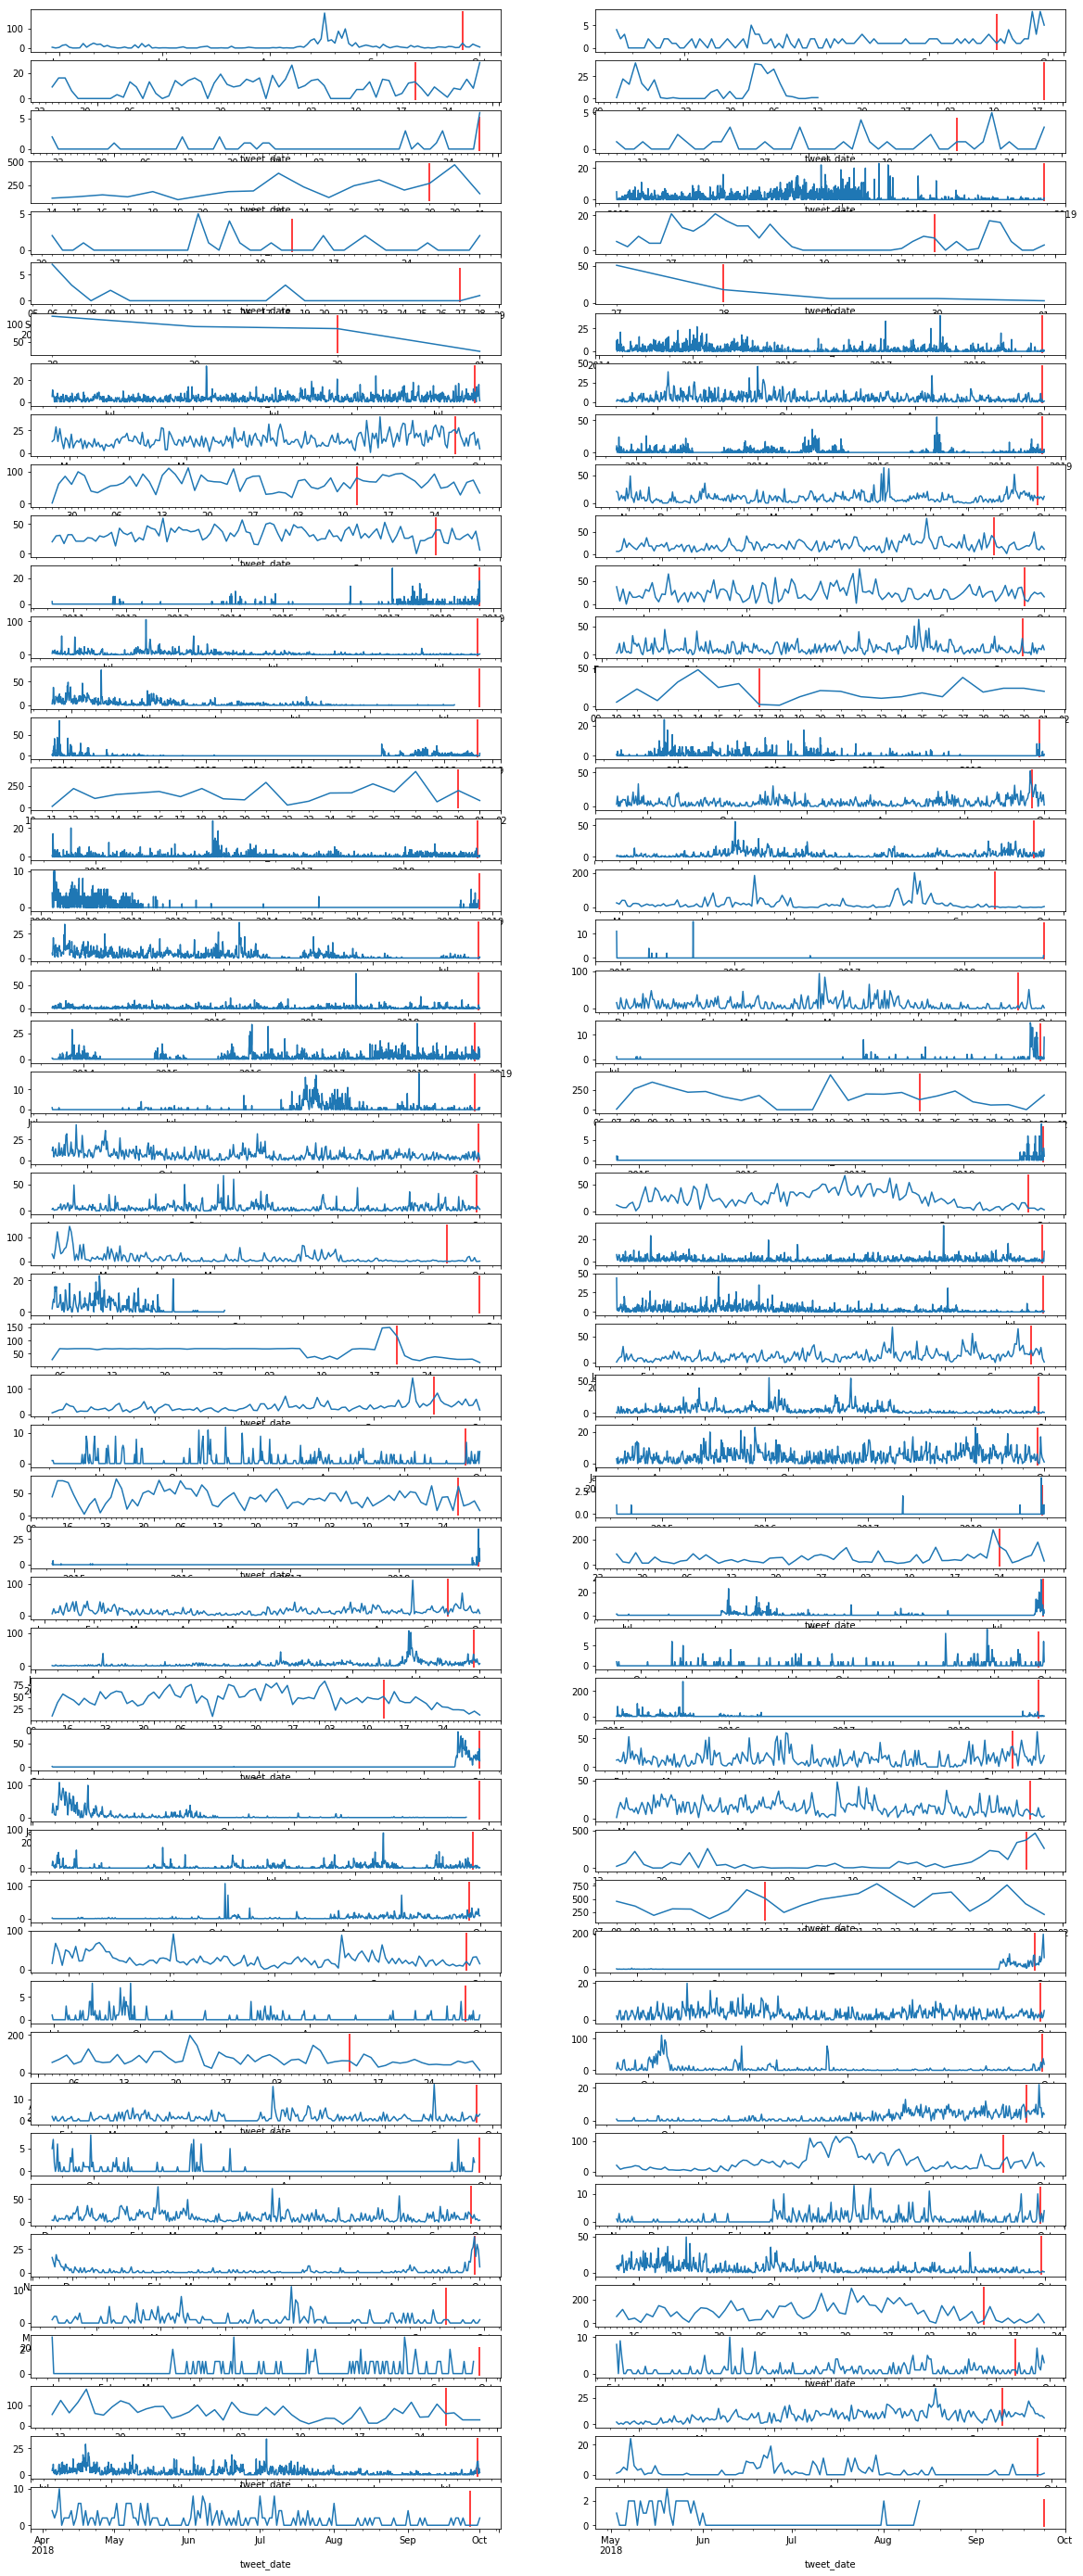

In [145]:
fig, outer_ax = plt.subplots(user_limit//2, 2, 'none', figsize=(user_limit//5,user_limit/2))

for (user, tweet_series), ax_pos in zip(user_tweet_series.groupby('user_id'), outer_ax.flat):
    tweet_series['const'] = 1
    notice_date = notice_twit_user[notice_twit_user['user_id']==user]['notice_date'].iloc[0]
#     print(user, notice_date)
    ax = tweet_series.set_index('tweet_date')['const'].resample('D').sum().plot(ax=ax_pos)
    ymin, ymax = ax.get_ylim()
    ax.vlines(x=[notice_date], ymin=ymin, ymax=ymax-1, color='r')



    plt.show()

In [22]:
experiment_end_date = datetime.datetime(2018,10,2)
udf = None

for uid, udf in user_tweet_series.groupby('user_id'):
    udf = udf
    break


In [148]:
def count_before_all(udf):
    return udf[udf['tweet_date'] < udf['notice_date']].count()['tweet_date']

def count_after_all(udf):
    return udf[udf['tweet_date'] >= udf['notice_date']].count()['tweet_date']

def count_before_sym_range(udf):
    return udf[(udf['notice_date'] - udf['tweet_date'] <= collection_range) & (udf['tweet_date'] < udf['notice_date'])].count()['tweet_date']

In [149]:
user_tweet_before_all = user_tweet_series.groupby('user_id').apply(count_before_all)
user_tweet_before_sym_range = user_tweet_series.groupby('user_id').apply(count_before_sym_range)
user_tweet_after_all = user_tweet_series.groupby('user_id').apply(count_after_all)

In [159]:
user_tweet_counts = pd.concat([user_tweet_before_all, user_tweet_before_sym_range, user_tweet_after_all], axis=1)
user_tweet_counts.columns = ['user_tweet_before_all', 'user_tweet_before_sym_range', 'user_tweet_after_all']

In [161]:
user_tweet_counts.mean()

user_tweet_before_all          2080.38
user_tweet_before_sym_range      96.14
user_tweet_after_all            166.63
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb30c823b70>,
      dtype=object)

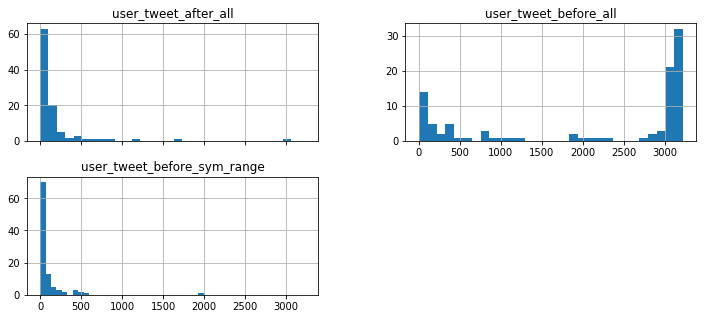

In [169]:
user_tweet_counts.hist(figsize=(12,5), bins=30, sharex=True)

# Pure SQL

In [ ]:
lum_not_sql = '''SELECT date(date_received) as dr, count(date(date_received))
FROM lumen_notices
GROUP by dr
'''
lum_not_df = pd.read_sql(lum_not_sql, db_engine, parse_dates=['dr'])

lum_not_df

In [171]:
twit_user_processed = '''-- how many in process
SELECT CS_oldest_tweets_archived, count(CS_oldest_tweets_archived) from twitter_users
	group by CS_oldest_tweets_archived
'''
twit_user_processed_df = pd.read_sql(twit_user_processed, db_engine)
twit_user_processed_df

,CS_oldest_tweets_archived,count(CS_oldest_tweets_archived)
0,1,9142
1,2,46
2,3,14713


In [ ]:
twit_user_rec_created = '''select date(record_created_at) as drca, COUNT(date(record_created_at)) from twitter_users
GROUP by drca
'''
twit_user_rec_created_df = pd.read_sql(twit_user_rec_created, db_engine, parse_dates=['drca'])
twit_user_rec_created_df

In [ ]:
lumen_twit = '''select notice_id, date_received, twitter_user_id from lumen_notice_to_twitter_user as lum_twit
left join (select id, date_received from lumen_notices) as lum_notice
on lum_twit.notice_id = lum_notice.id
'''
lumen_twit_df = pd.read_sql(lumen_twit, db_engine, parse_dates=['date_received'])
lumen_twit_df.head()

In [ ]:
twitid_complaints = lumen_twit_df.groupby('twitter_user_id').agg({'notice_id':len}).rename({'notice_id':'complaints_received'}, axis=1)

In [ ]:
len(twitid_complaints[twitid_complaints['complaints_received']>1])/len(twitid_complaints)

In [ ]:
twitter_rate_sql = '''select max(reset_time), user_id from twitter_ratestate
group by user_id'''
twitter_rate_df = pd.read_sql(twitter_rate_sql, db_engine, parse_dates=['max(reset_time)'])
twitter_rate_df

In [ ]:
before_after_tweets_sql = '''create TEMPORARY table notice_twit_user as
(
select n.date_received as notice_date, ltt.twitter_user_id as twitter_user_id from lumen_notices as n
join lumen_notice_to_twitter_user as ltt
on n.id = ltt.notice_id
)

select * from notice_twit_user

-- make this relation first and then later groupby
create TEMPORARY table notice_tweet as (
select notice_date, twitter_user_id, created_at as tweet_date
from notice_twit_user nt
join twitter_statuses ts
on nt.twitter_user_id = ts.user_id
)


select sum(before_tweet) as before_tweets, sum(after_tweet) as after_tweets, twitter_user_id 
from 
 (select tweet_date, 
		notice_date,
		case when tweet_date < notice_date then 1 else 0 end as before_tweet,
		case when tweet_date > notice_date then 1 else 0 end as after_tweet,
		twitter_user_id
	from notice_tweet ) as tweet_timing
group by twitter_user_id
'''